In [ ]:
pip install -q --use-deprecated=legacy-resolver tflite-model-maker


     |████████████████████████████████| 616 kB 4.0 MB/s 
     |████████████████████████████████| 87 kB 6.9 MB/s 
     |████████████████████████████████| 120 kB 48.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.2 MB/s 
     |████████████████████████████████| 213 kB 50.8 MB/s 
     |████████████████████████████████| 840 kB 53.1 MB/s 
     |████████████████████████████████| 596 kB 46.9 MB/s 
     |████████████████████████████████| 3.4 MB 23.5 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 6.3 MB 40.5 MB/s 
     |████████████████████████████████| 1.1 MB 50.3 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
     |████████████████████████████████| 208 kB 50.2 MB/s 
     |████████████████████████████████| 352 kB 26.4 MB/s 
     |████████████████████████████████| 99 kB 5.5 MB/s 
     |████████████████████████████████| 47.6 MB 105 kB/s 
     |████████████████████████████████| 25.3 MB 1.7 MB/s 


In [ ]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
!curl -L "https://public.roboflow.com/ds/XfW7ouXltj?key=nyS3hhbV92" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1003      0 --:--:-- --:--:-- --:--:--  1002
100 18.2M  100 18.2M    0     0  8944k      0  0:00:02  0:00:02 --:--:-- 74.5M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.xml  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.xml  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3

In [ ]:
spec = model_spec.get('efficientdet_lite4')

In [ ]:
train_data=object_detector.DataLoader.from_pascal_voc(images_dir="/content/train", annotations_dir="/content/train", label_map={1: "bishop", 2: "black-bishop",3:"black-king",4:"black-knight",5:"black-pawn",6:"black-queen",7:"black-rook",8:"white-bishop",9:"white-king",10:"white-knight",11:"white-pawn",12:"white-queen",13:"white-rook"})

In [ ]:
validation_data=object_detector.DataLoader.from_pascal_voc(images_dir="/content/valid", annotations_dir="/content/valid", label_map={1: "bishop", 2: "black-bishop",3:"black-king",4:"black-knight",5:"black-pawn",6:"black-queen",7:"black-rook",8:"white-bishop",9:"white-king",10:"white-knight",11:"white-pawn",12:"white-queen",13:"white-rook"})

In [ ]:
test_data=object_detector.DataLoader.from_pascal_voc(images_dir="/content/test", annotations_dir="/content/test", label_map={1: "bishop", 2: "black-bishop",3:"black-king",4:"black-knight",5:"black-pawn",6:"black-queen",7:"black-rook",8:"white-bishop",9:"white-king",10:"white-knight",11:"white-pawn",12:"white-queen",13:"white-rook"})

In [ ]:
model = object_detector.create(train_data,model_spec=spec,epochs=20,batch_size=8,validation_data=validation_data)

Epoch 1/20
75/75 [==============================] - 158s 2s/step - det_loss: 1.5030 - cls_loss: 1.0960 - box_loss: 0.0081 - reg_l2_loss: 0.0089 - loss: 1.5119 - learning_rate: 0.0090 - gradient_norm: 0.7890 - val_det_loss: 1.1542 - val_cls_loss: 0.9855 - val_box_loss: 0.0034 - val_reg_l2_loss: 0.0090 - val_loss: 1.1631
Epoch 2/20
75/75 [==============================] - 110s 1s/step - det_loss: 1.0329 - cls_loss: 0.7740 - box_loss: 0.0052 - reg_l2_loss: 0.0090 - loss: 1.0418 - learning_rate: 0.0098 - gradient_norm: 1.2757 - val_det_loss: 0.8116 - val_cls_loss: 0.6540 - val_box_loss: 0.0032 - val_reg_l2_loss: 0.0090 - val_loss: 0.8206
Epoch 3/20
75/75 [==============================] - 110s 1s/step - det_loss: 0.9283 - cls_loss: 0.7076 - box_loss: 0.0044 - reg_l2_loss: 0.0090 - loss: 0.9373 - learning_rate: 0.0096 - gradient_norm: 1.4894 - val_det_loss: 0.7776 - val_cls_loss: 0.5608 - val_box_loss: 0.0043 - val_reg_l2_loss: 0.0090 - val_loss: 0.7867
Epoch 4/20
75/75 [===================

In [ ]:
model.export(export_dir='.')

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 27s 27s/step



{'AP': 0.4839387,
 'AP50': 0.7429589,
 'AP75': 0.58883464,
 'AP_/bishop': -1.0,
 'AP_/black-bishop': 0.3418142,
 'AP_/black-king': 0.55245197,
 'AP_/black-knight': 0.5535999,
 'AP_/black-pawn': 0.676652,
 'AP_/black-queen': 0.20544751,
 'AP_/black-rook': 0.5923476,
 'AP_/white-bishop': 0.39916188,
 'AP_/white-king': 0.5046626,
 'AP_/white-knight': 0.53900224,
 'AP_/white-pawn': 0.66283995,
 'AP_/white-queen': 0.25773835,
 'AP_/white-rook': 0.5215462,
 'APl': -1.0,
 'APm': 0.49577624,
 'APs': 0.64098686,
 'ARl': -1.0,
 'ARm': 0.6638164,
 'ARmax1': 0.3555519,
 'ARmax10': 0.64832026,
 'ARmax100': 0.65042996,
 'ARs': 0.6862281}

In [ ]:
import cv2

from PIL import Image

model_path = '/content/model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

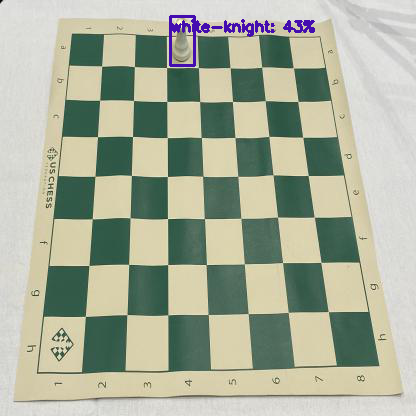

In [ ]:
# INPUT_IMAGE_URL = "/content/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg"
DETECTION_THRESHOLD = 0.3

TEMP_FILE = '/tmp/image.png'

# !wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open("/content/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg")
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)